<a href="https://colab.research.google.com/github/MasBarr/Barrett2024/blob/main/BarrettFig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image loaded successfully from GitHub!


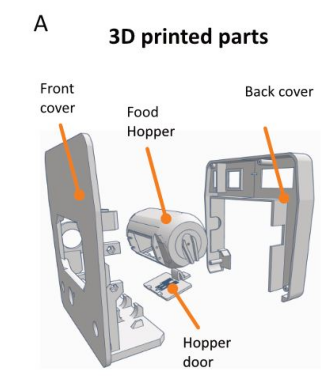

In [18]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def load_image_from_github(username, repo, branch, folder, file_name):
    # Construct the raw file URL to download the image
    file_url = f"https://raw.githubusercontent.com/{username}/{repo}/{branch}/{folder}/{file_name}"
    file_response = requests.get(file_url)

    if file_response.status_code == 200:
        # Open the image from the response content
        image = Image.open(BytesIO(file_response.content))
        print("Image loaded successfully from GitHub!")
        return image
    else:
        print(f"Failed to download the image: {file_response.status_code}")
        return None

# GitHub details
username = "KravitzLabDevices"  # Corrected organization name
repo = "CastleFeeder"
branch = "main"
folder = "photos"  # Assuming the folder is named Photos
file_name = "Castle3DParts.JPG"  # Replace with your actual image filename if different

# Load the image
image = load_image_from_github(username, repo, branch, folder, file_name)

# Display the image
if image is not None:
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Image loading failed. Check the GitHub URL or repository structure.")


Image loaded successfully from GitHub!


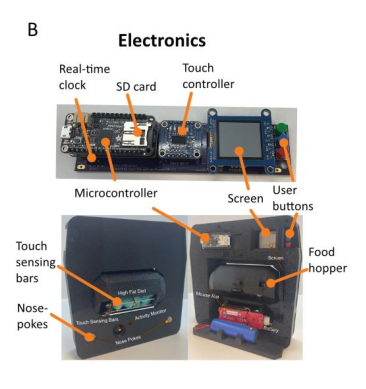

In [19]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def load_image_from_github(username, repo, branch, folder, file_name):
    # Construct the raw file URL to download the image
    file_url = f"https://raw.githubusercontent.com/{username}/{repo}/{branch}/{folder}/{file_name}"
    file_response = requests.get(file_url)

    if file_response.status_code == 200:
        # Open the image from the response content
        image = Image.open(BytesIO(file_response.content))
        print("Image loaded successfully from GitHub!")
        return image
    else:
        print(f"Failed to download the image: {file_response.status_code}")
        return None

# GitHub details
username = "KravitzLabDevices"  # Corrected organization name
repo = "CastleFeeder"
branch = "main"
folder = "photos"  # Assuming the folder is named Photos
file_name = "CastleElectronics.JPG"  # Replace with your actual image filename if different

# Load the image
image = load_image_from_github(username, repo, branch, folder, file_name)

# Display the image
if image is not None:
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Image loading failed. Check the GitHub URL or repository structure.")


In [1]:
pip install pingouin

Data loaded successfully from GitHub!
Data processing complete.


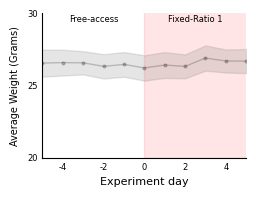

First 6 Days (Days 1-6):
Average Weight: 26.45 ± 0.34 grams
Average Food Intake: 3.89 ± 0.20 grams

Last 6 Days (Days 7-12):
Average Weight: 26.61 ± 0.37 grams
Average Food Intake: 3.98 ± 0.16 grams
Paired t-test for Weight (First 6 Days vs. Last 6 Days):
               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -1.855022   12   two-sided  0.088315  [-0.34, 0.03]  0.050329  1.052   

           power  
T-test  0.053218  

Paired t-test for Food Intake (First 6 Days vs. Last 6 Days):
               T  dof alternative     p-val          CI95%   cohen-d BF10  \
T-test -0.412041   12   two-sided  0.687574  [-0.55, 0.38]  0.128168  0.3   

           power  
T-test  0.071066  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pingouin as pg
import requests

import requests
import pandas as pd

def load_csv_from_github(username, repo, branch, folder, file_name):
    # Construct the raw file URL to download the CSV file
    file_url = f"https://raw.githubusercontent.com/{username}/{repo}/{branch}/{folder}/{file_name}"
    file_response = requests.get(file_url)

    if file_response.status_code == 200:
        # Load the CSV data directly from the URL response content
        data = pd.read_csv(file_url)
        print("Data loaded successfully from GitHub!")
        return data
    else:
        print(f"Failed to download the file: {file_response.status_code}")
        return None

# Load the data
username = "MasBarr"
repo = "Barrett2024"
branch = "main"
folder = "Data/Fig4"
file_name = "Fig4_Analysis.csv"

data = load_csv_from_github(username, repo, branch, folder, file_name)

# Check if data loaded successfully before processing
if data is not None:
    # Process the loaded data
    data = data.dropna(how='all', axis=1).dropna(how='all')
    data['day'] = data['day'].astype(int)
    filtered_data = data.query('day >= 1 and day <= 12').copy()
    filtered_data['day'] = filtered_data['day'] - 1
    filtered_data['notes'] = filtered_data['notes'].str.strip().str.lower()
    filtered_data = filtered_data[~((filtered_data['notes'] == 'free with chow') & (filtered_data['day'] > 5))]
    filtered_data = filtered_data[~((filtered_data['notes'] == 'fr1 with chow') & (filtered_data['day'] == 5))]
    filtered_data = filtered_data[filtered_data['mouse'] != 'M1']

    average_weight_by_task = filtered_data.groupby(['day', 'notes'])['weight'].agg(['mean', 'sem']).reset_index()
    combined_avg_data = pd.concat([
        average_weight_by_task[average_weight_by_task['notes'] == 'free with chow'],
        average_weight_by_task[average_weight_by_task['notes'] == 'fr1 with chow']
    ]).sort_values(by='day').reset_index(drop=True)

    print("Data processing complete.")
else:
    print("Data loading failed. Check the GitHub URL or repository structure.")



# Plot settings
font_sizes = {
    'title': 8,
    'xlabel': 8,
    'ylabel': 7,
    'xticks': 6,
    'yticks': 6,
    'legend': 6,
    'inset_title': 6,
    'inset_ylabel': 6,
    'anova_text': 5
}
plt.rcParams['font.family'] = 'DejaVu Sans'
fig_width_in = 60 / 25.4
fig_height_in = 45 / 25.4

# Create the plot for Set 1
fig, ax1 = plt.subplots(figsize=(fig_width_in, fig_height_in))

# Plot for Set 1
ax1.add_patch(Rectangle((6, 20), 7.5, 15, color='red', alpha=0.1))
ax1.text(3.5, 29.4, 'Free-access', color='black', fontsize=6, ha='center')
ax1.text(8.5, 29.4, 'Fixed-Ratio 1', color='black', fontsize=6, ha='center')
x1 = combined_avg_data['day']
y1 = combined_avg_data['mean']
sem1 = combined_avg_data['sem']
ax1.plot(x1, y1, marker='o', color='black', alpha=0.2, linewidth=1.0, markersize=2)
ax1.fill_between(x1, y1 - sem1, y1 + sem1, color='grey', alpha=0.2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylim(20, 30)
ax1.set_xlim(1, 11)
ax1.set_xlabel('Experiment day', fontsize=font_sizes['xlabel'])
ax1.set_ylabel('Average Weight (Grams)', fontsize=font_sizes['ylabel'], labelpad=5)
ax1.set_xticks([2, 4, 6, 8, 10])
ax1.set_xticklabels([-4, -2, 0, 2, 4], fontsize=font_sizes['xticks'])
ax1.set_yticks([20, 25, 30])
ax1.set_yticklabels([20, 25, 30], fontsize=font_sizes['yticks'])
ax1.tick_params(axis='both', which='both', length=0)
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')


# Adjust layout and save the figure
plt.tight_layout(pad=0)
plt.savefig("Fig.4F.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()



#STATS
# First 6 days: days 1-6
first_6_days_data = filtered_data[filtered_data['day'].between(1, 6)]

# Last 6 days: days 7-12
last_6_days_data = filtered_data[filtered_data['day'].between(7, 12)]

# Calculate average and SEM for weight during first and last 6 days
average_weight_first_6_days = first_6_days_data['weight'].mean()
sem_weight_first_6_days = first_6_days_data['weight'].sem()

average_weight_last_6_days = last_6_days_data['weight'].mean()
sem_weight_last_6_days = last_6_days_data['weight'].sem()

# Calculate average and SEM for food intake (device gain) during first and last 6 days
average_food_intake_first_6_days = first_6_days_data['device gain'].mean()
sem_food_intake_first_6_days = first_6_days_data['device gain'].sem()

average_food_intake_last_6_days = last_6_days_data['device gain'].mean()
sem_food_intake_last_6_days = last_6_days_data['device gain'].sem()

# Display the results
print(f"First 6 Days (Days 1-6):")
print(f"Average Weight: {average_weight_first_6_days:.2f} ± {sem_weight_first_6_days:.2f} grams")
print(f"Average Food Intake: {average_food_intake_first_6_days:.2f} ± {sem_food_intake_first_6_days:.2f} grams")

print(f"\nLast 6 Days (Days 7-12):")
print(f"Average Weight: {average_weight_last_6_days:.2f} ± {sem_weight_last_6_days:.2f} grams")
print(f"Average Food Intake: {average_food_intake_last_6_days:.2f} ± {sem_food_intake_last_6_days:.2f} grams")


# Prepare the data for the paired t-test using Pingouin

# For weight: Average weight by mouse for first and last 6 days
weight_first_6_days = first_6_days_data.groupby('mouse')['weight'].mean().reset_index(name='weight_first')
weight_last_6_days = last_6_days_data.groupby('mouse')['weight'].mean().reset_index(name='weight_last')

# Merge the first and last weights into one dataframe
weight_data = weight_first_6_days.merge(weight_last_6_days, on='mouse')

# Perform paired t-test for weight
weight_ttest = pg.ttest(weight_data['weight_first'], weight_data['weight_last'], paired=True)

# For food intake: Average intake by mouse for first and last 6 days
intake_first_6_days = first_6_days_data.groupby('mouse')['device gain'].mean().reset_index(name='intake_first')
intake_last_6_days = last_6_days_data.groupby('mouse')['device gain'].mean().reset_index(name='intake_last')

# Merge the first and last food intake into one dataframe
intake_data = intake_first_6_days.merge(intake_last_6_days, on='mouse')

# Perform paired t-test for food intake
intake_ttest = pg.ttest(intake_data['intake_first'], intake_data['intake_last'], paired=True)

# Display the results
print("Paired t-test for Weight (First 6 Days vs. Last 6 Days):")
print(weight_ttest)

print("\nPaired t-test for Food Intake (First 6 Days vs. Last 6 Days):")
print(intake_ttest)


Data loaded successfully from GitHub!
Data processing complete.


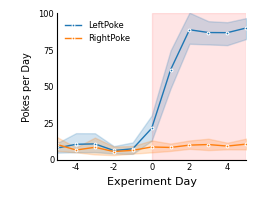

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
from matplotlib.patches import Rectangle
import requests
from io import BytesIO

def load_zip_from_github(username, repo, branch, folder, file_name):
    # Construct the raw file URL to download the zip file
    file_url = f"https://raw.githubusercontent.com/{username}/{repo}/{branch}/{folder}/{file_name}"
    file_response = requests.get(file_url)

    if file_response.status_code == 200:
        # Open the zip file from bytes
        zip_file = zipfile.ZipFile(BytesIO(file_response.content))
        dfs = []
        for file_name in zip_file.namelist():
            with zip_file.open(file_name) as file:
                df = pd.read_csv(file)
                df['Filename'] = file_name
                dfs.append(df)

        combined_df = pd.concat(dfs, ignore_index=True)
        combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])
        combined_df['Hour'] = combined_df['Timestamp'].dt.hour
        combined_df['ExptHour'] = combined_df['Hour'] - 16
        combined_df['ExptHour'] = combined_df['ExptHour'].apply(lambda x: x + 24 if x < 0 else x)
        combined_df['ExptTime'] = (combined_df['ExptDay'] + combined_df['ExptHour'] / 24.0).round(2)

        print("Data loaded successfully from GitHub!")
        return combined_df
    else:
        print(f"Failed to download the file: {file_response.status_code}")
        return None

# Load the data
username = "MasBarr"
repo = "Barrett2024"
branch = "main"
folder = "Data/Fig4"
file_name = "Castle_ChowData_Cleaned.zip"

combined_df = load_zip_from_github(username, repo, branch, folder, file_name)

# Ensure that combined_df is not None before proceeding
if combined_df is not None:
    # Data processing for daily summary
    daily_df = combined_df.groupby(['ExptDay', 'Filename']).mean(numeric_only=True).reset_index().round(2)
    daily_df = daily_df.sort_values(by=["Filename", "ExptTime"])
    daily_df["LeftCount_diff"] = daily_df.groupby("Filename")["LeftCount"].diff()
    daily_df["RightCount_diff"] = daily_df.groupby("Filename")["RightCount"].diff()

    print("Data processing complete.")
else:
    print("Data loading failed. Check the GitHub URL or repository structure.")

# Plot settings
font_sizes = {
    'title': 8,
    'xlabel': 8,
    'ylabel': 7,
    'xticks': 6,
    'yticks': 6,
    'legend': 6,
    'inset_title': 6,
    'inset_ylabel': 6,
    'anova_text': 5
}

plt.rcParams['font.family'] = 'DejaVu Sans'
fig_width_in = 60 / 25.4
fig_height_in = 45 / 25.4

# Create the plot for Set 2 (correct pokes plot)
fig, ax2 = plt.subplots(figsize=(fig_width_in, fig_height_in))

# Plot for Set 2
ax2.add_patch(Rectangle((0, 0), 5, 100, color='red', alpha=0.1))
sns.lineplot(data=daily_df, x="ExptDay", y="LeftCount_diff", lw=1, label="LeftPoke", marker="o", markersize=2, ax=ax2)
sns.lineplot(data=daily_df, x="ExptDay", y="RightCount_diff", lw=1, label="RightPoke", marker="o", markersize=2, ax=ax2)
ax2.set_ylim(0, 100)
ax2.set_xlim(-5, 5)
ax2.set_xlabel('Experiment Day', fontsize=font_sizes['xlabel'])
ax2.set_ylabel(' \nPokes per Day', fontsize=font_sizes['ylabel'], labelpad=5)
plt.legend(frameon=False, loc='upper left', fontsize=font_sizes['legend'])
ax2.set_xticks([-4, -2, 0, 2, 4])
ax2.set_xticklabels([-4, -2, 0, 2, 4], fontsize=font_sizes['xticks'])
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.set_yticklabels([0, 25, 50, 75, 100], fontsize=font_sizes['yticks'])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', which='both', length=0)
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')

# Adjust tick parameters for closer placement to axis lines
ax2.tick_params(axis='y', which='both', direction='out', length=0, width=0, pad=2)
ax2.tick_params(axis='x', which='both', direction='out', length=0, width=0, pad=2)

plt.tight_layout(pad=0)
plt.savefig("Fig.S4.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()
